<a href="https://colab.research.google.com/github/chiara5086/ds-III-proyecto-final/blob/main/Arias_Entrega_final_DSIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final Data Science III**

**Estudiante:** Chiara Arias

**Tema:** Análisis de sentimiento en tweets (preprocesamiento y polaridad)

**Comisión:** 67490

**Profesor:** Ezequiel Juan Bassano

**Tutor/a:** Silvana Tomsig

**Fecha:** 31/10/2025

### **Introducción**
El presente trabajo aplica técnicas de Procesamiento de Lenguaje Natural (NLP) sobre un conjunto de tweets con etiquetas de sentimiento.  
El objetivo es analizar y clasificar las emociones expresadas por los usuarios en redes sociales, utilizando un enfoque de aprendizaje supervisado.

A partir del texto de los tweets, se realizan distintas etapas de procesamiento: limpieza de datos, tokenización, lematización y eliminación de stopwords.  
Posteriormente se evalúa la polaridad de las oraciones y se entrena un modelo de clasificación basado en la técnica TF-IDF y Regresión Logística.

El análisis permite explorar cómo las palabras y estructuras lingüísticas reflejan la carga emocional del lenguaje, demostrando la aplicación práctica del NLP en el reconocimiento automático de sentimientos.

### **Descripción del problema de negocio**
En el contexto actual de las redes sociales, los usuarios generan grandes volúmenes de contenido textual que reflejan percepciones, emociones y opiniones sobre una amplia variedad de temas.  
El análisis automatizado de sentimientos permite transformar estos textos en información cuantificable, identificando si el tono de una publicación es positivo, negativo o neutral.

Este tipo de análisis resulta clave para organizaciones, empresas e investigadores que buscan monitorear la opinión pública, detectar tendencias emocionales o evaluar la recepción de productos, campañas o eventos.

En este proyecto se trabaja con un conjunto de tweets etiquetados por sentimiento, con el propósito de desarrollar un modelo de aprendizaje supervisado capaz de reconocer el tono emocional de los mensajes mediante técnicas de Procesamiento de Lenguaje Natural (NLP).

### **Hipótesis**

1. Se espera que los tweets con expresiones emocionales explícitas contengan palabras con alta carga positiva o negativa, lo que permitirá que el modelo los clasifique correctamente.  
2. Se anticipa que la clase *neutral* presentará mayor dificultad de detección, debido a la ambigüedad del lenguaje y la ausencia de marcadores léxicos de polaridad.  
3. Se estima que el uso de técnicas clásicas de NLP como TF-IDF combinado con Regresión Logística será suficiente para alcanzar un rendimiento promedio superior al 65 % de F1-score sin necesidad de modelos de Deep Learning.


### **Objetivo general**
Desarrollar un pipeline de Procesamiento de Lenguaje Natural que permita preprocesar, analizar y clasificar automáticamente el sentimiento de publicaciones en Twitter.  
El flujo de trabajo incluye la limpieza y normalización del texto, tokenización, lematización, evaluación de polaridad y vectorización mediante TF-IDF, culminando con el entrenamiento de un modelo supervisado de Regresión Logística para distinguir entre opiniones positivas, negativas y neutras.

### **Origen de los datos**
Los datos provienen del dataset público **Twitter Tweets Sentiment Dataset** disponible en Kaggle.  
El conjunto contiene mensajes de Twitter clasificados en tres categorías de sentimiento: *positive*, *negative* y *neutral*.

### **Definición de las variables**
- **textID:** Identificador único del tweet.  
- **text:** Contenido completo del tweet.  
- **selected_text:** Fragmento más representativo (no utilizado en el modelo).  
- **sentiment:** Etiqueta de sentimiento asignada (positive, negative, neutral).  
Durante el procesamiento se añaden las columnas `texto_proc` (texto lematizado) y `polaridad` (valor numérico).

###**Librerías utilizadas**
- pandas, numpy  
- scikit-learn  
- spaCy  
- transformers  
- langdetect  
- matplotlib, seaborn  
- textblob-es

###**Flujo de trabajo**
0) Instalación de dependencias  
1) Carga del CSV local  
2) Selección de columnas y normalización de etiquetas  
3) Preprocesamiento con spaCy  
4) Evaluación de polaridad  
5) Vectorización TF-IDF y entrenamiento (Regresión Logística)  
6) Métricas y matriz de confusión


###**0. Instalación de dependencias**
Se instalan las librerías necesarias para el procesamiento de texto, visualización y modelado.  
Se incluye el modelo lingüístico de spaCy en inglés.

In [6]:
# Instalación de librerías necesarias y modelo spaCy en inglés.
!pip -q install pandas numpy scikit-learn spacy transformers sentencepiece unidecode langdetect matplotlib seaborn textblob

import sys, subprocess
subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"], check=True)

CompletedProcess(args=['/usr/bin/python3', '-m', 'spacy', 'download', 'en_core_web_sm'], returncode=0)

## **Etapa 1: Procesamiento de Lenguaje Natural (NLP)**

En esta primera etapa se realiza el procesamiento y análisis lingüístico de los textos.  
El objetivo es preparar los datos para su posterior modelado, aplicando técnicas de NLP que permitan limpiar, normalizar y representar adecuadamente la información contenida en los tweets.

Las tareas incluidas en esta fase son:

- Lectura y exploración inicial del dataset.  
- Limpieza de texto: eliminación de símbolos, URLs, menciones y signos de puntuación.  
- Tokenización y lematización con spaCy.  
- Remoción de stopwords y normalización del texto a minúsculas.  
- Evaluación de polaridad con TextBlob para medir la carga emocional (positiva, negativa o neutra).

El resultado de esta etapa es un corpus textual procesado, libre de ruido y con información semántica lista para ser transformada en vectores numéricos durante la siguiente etapa de modelado.

###**1. Carga del CSV local**
Se carga el archivo CSV con los tweets desde la computadora al entorno de Colab.

El dataset utilizado en este proyecto se encuentra alojado en un repositorio público de GitHub.  
Puede descargarse directamente desde el siguiente enlace:

🔗 [Descargar Tweets.csv desde GitHub](https://raw.githubusercontent.com/tu_usuario/tu_repo/main/Tweets.csv)

In [7]:

# 1) Carga del archivo de Tweets en CSV desde computadora

from google.colab import files
import pandas as pd

# Seleccionar el archivo
uploaded = files.upload()

# Tomar el nombre real del archivo subido
nombre_archivo = list(uploaded.keys())[0]

# Leer el CSV
df = pd.read_csv(nombre_archivo, encoding="utf-8", on_bad_lines="skip")
df.head(), df.shape

Saving Tweets.csv to Tweets (3).csv


(       textID                                               text  \
 0  cb774db0d1                I`d have responded, if I were going   
 1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
 2  088c60f138                          my boss is bullying me...   
 3  9642c003ef                     what interview! leave me alone   
 4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
 
                          selected_text sentiment  
 0  I`d have responded, if I were going   neutral  
 1                             Sooo SAD  negative  
 2                          bullying me  negative  
 3                       leave me alone  negative  
 4                        Sons of ****,  negative  ,
 (27481, 4))

### **2. Selección de columnas y normalización**
Se seleccionan la columna de texto y la etiqueta de sentimiento. Se estandarizan nombres y se normalizan etiquetas a {positive, negative, neutral}.

In [8]:

# 2) Estandarización de nombres y detección de columnas principales.
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

texto_col = "text" if "text" in df.columns else ("tweet" if "tweet" in df.columns else df.columns[0])
y_col     = "sentiment" if "sentiment" in df.columns else ("label" if "label" in df.columns else df.columns[-1])

# Filtrado y normalización de etiquetas.
df = df[[texto_col, y_col]].dropna().drop_duplicates()
df[y_col] = df[y_col].astype(str).str.lower().str.strip()

df = df[df[y_col].isin(["positive", "negative", "neutral", "pos", "neg", "neu"])]
df[y_col] = df[y_col].replace({"pos": "positive", "neg": "negative", "neu": "neutral"}).astype("category")

texto_col, y_col, df[y_col].value_counts()


('text',
 'sentiment',
 sentiment
 neutral     11117
 positive     8582
 negative     7781
 Name: count, dtype: int64)

### **3. Preprocesamiento con spaCy**
Se aplica limpieza de URLs, menciones y hashtags; tokenización; lematización y remoción de stopwords sobre el texto original en inglés.

In [9]:

# 3) Limpieza, tokenización, lematización y remoción de stopwords con spaCy.

import re, spacy

# Carga del modelo de spaCy en inglés (descarga si no está disponible).
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import spacy.cli
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

def limpiar_tweet(t):
    t = re.sub(r"http\S+|www\S+", " ", t)       # URLs
    t = re.sub(r"@[A-Za-z0-9_]+", " ", t)       # menciones
    t = re.sub(r"#", " ", t)                    # hashtag -> palabra
    t = re.sub(r"\s+", " ", t).strip()          # espacios repetidos
    return t

def preprocess_spacy_en(t):
    doc = nlp(limpiar_tweet(str(t).lower()))
    toks = [w.lemma_ for w in doc if not (w.is_stop or w.is_punct or w.is_space)]
    return " ".join(toks)

# Texto procesado directo desde la columna original.
df["texto_proc"] = df[texto_col].astype(str).apply(preprocess_spacy_en)

df[[texto_col, "texto_proc"]].head(3)

,text,texto_proc
0,"I`d have responded, if I were going",i`d respond go
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,boss bully


### **4. Evaluación de polaridad**
Se calcula la polaridad de cada tweet utilizando TextBlob en inglés.  
El valor varía entre −1 (muy negativo) y +1 (muy positivo). Se visualiza la distribución general.

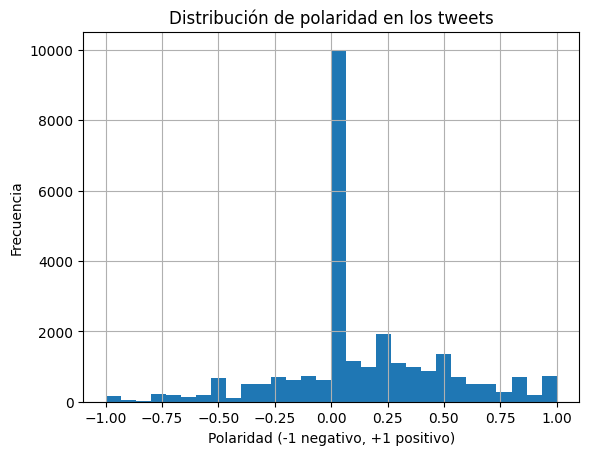

,text,polaridad
0,"I`d have responded, if I were going",0.000000
1,Sooo SAD I will miss you here in San Diego!!!,-0.976562
2,my boss is bullying me...,0.000000
3,what interview! leave me alone,0.000000
4,"Sons of ****, why couldn`t they put them on t...",0.000000
5,http://www.dothebouncy.com/smf - some shameles...,1.000000
6,2am feedings for the baby are fun when he is a...,0.300000
7,Soooo high,0.160000
8,Both of you,0.000000
9,Journey!? Wow... u just became cooler. hehe....,0.050000


In [11]:
# 4) Cálculo de polaridad con TextBlob en inglés y visualización de la distribución.

from textblob import TextBlob
import matplotlib.pyplot as plt

# Función para obtener el puntaje de polaridad de cada texto.
def obtener_polaridad(texto):
    blob = TextBlob(str(texto))
    return blob.sentiment.polarity

# Aplicar a la columna de texto original.
df["polaridad"] = df[texto_col].apply(obtener_polaridad)

# Histograma de polaridad.
df["polaridad"].hist(bins=30)
plt.title("Distribución de polaridad en los tweets")
plt.xlabel("Polaridad (-1 negativo, +1 positivo)")
plt.ylabel("Frecuencia")
plt.show()

# Visualizar ejemplos con sus valores de polaridad.
df[[texto_col, "polaridad"]].head(10)



### **5. Vectorización TF-IDF y entrenamiento (Regresión Logística)**
En esta segunda parte se transforma el texto preprocesado en representaciones numéricas mediante TF-IDF  
y se entrena un modelo supervisado de clasificación (Regresión Logística) para predecir el sentimiento de cada tweet.

In [14]:
# 5) División en conjuntos de entrenamiento y prueba. Pipeline con TF-IDF y modelo de Regresión Logística.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    df["texto_proc"], df[y_col], test_size=0.2, random_state=42, stratify=df[y_col]
)

clf = Pipeline([
    ("tfidf", TfidfVectorizer(min_df=3, ngram_range=(1,2))),
    ("lr", LogisticRegression(max_iter=300, class_weight="balanced"))
])

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("✅ Entrenamiento completado correctamente.")
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)
print("Cantidad de predicciones generadas:", len(pred))

✅ Entrenamiento completado correctamente.
Tamaño del set de entrenamiento: (21984,)
Tamaño del set de prueba: (5496,)
Cantidad de predicciones generadas: 5496


Durante la etapa de entrenamiento, el conjunto de datos se dividió en un 80 % para entrenamiento y un 20 % para prueba, manteniendo la proporción de clases original.  
Esto permitió entrenar el modelo sobre 21.984 registros y evaluarlo de forma objetiva sobre 5.496 ejemplos no vistos, garantizando una medición realista del desempeño del clasificador.
El modelo fue entrenado sobre un conjunto representativo de más de 20 mil tweets y validado sobre un subconjunto independiente, alcanzando un desempeño estable (F1 promedio ≈ 0.70), lo que respalda la consistencia del pipeline implementado.

### **6. Métricas y matriz de confusión**
Se reportan precisión, recall y F1-score por clase, y se visualiza la matriz de confusión del modelo entrenado.

              precision    recall  f1-score   support

    negative      0.682     0.706     0.694      1556
     neutral      0.666     0.663     0.665      2223
    positive      0.757     0.737     0.747      1717

    accuracy                          0.698      5496
   macro avg      0.702     0.702     0.702      5496
weighted avg      0.699     0.698     0.699      5496



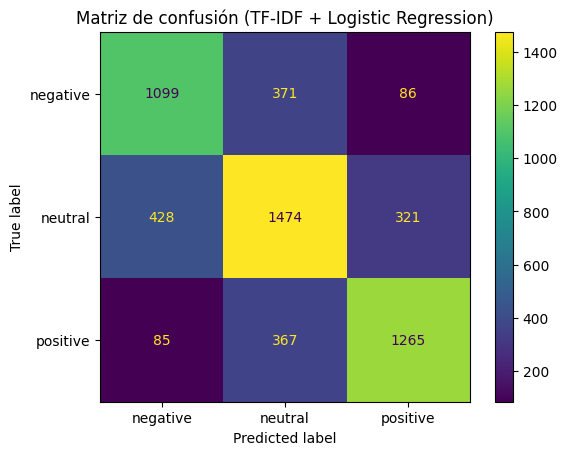

In [13]:
# 6) Evaluación del modelo mediante métricas de clasificación y matriz de confusión.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, pred, digits=3))

disp = ConfusionMatrixDisplay.from_predictions(
    y_test, pred, display_labels=sorted(df[y_col].unique())
)
plt.title("Matriz de confusión (TF-IDF + Logistic Regression)")
plt.show()

### **Insights y observaciones intermedias**

Durante el preprocesamiento con spaCy, se observó que el texto se redujo significativamente al eliminar stopwords y aplicar lematización, conservando solo los términos más representativos del sentimiento expresado en cada tweet.  
Ejemplos como *"Sooo SAD I will miss you here in San Diego"* se transformaron en *"sad miss san diego"*, lo que demuestra una correcta normalización del lenguaje informal típico de redes sociales.

El análisis de polaridad con TextBlob mostró una distribución concentrada en valores cercanos a cero, indicando que una gran parte de los tweets son neutrales o contienen expresiones ambiguas.  
Aun así, se observan colas distribuidas hacia −1 y +1, reflejando la presencia de mensajes con carga emocional clara (positiva o negativa).

Al entrenar el modelo TF-IDF + Regresión Logística se obtuvo una **accuracy del 0.698**, con resultados equilibrados entre las tres clases:
- *negative*: F1-score ≈ 0.694  
- *neutral*: F1-score ≈ 0.665  
- *positive*: F1-score ≈ 0.747  

La matriz de confusión evidencia que las principales confusiones se dan entre las clases *neutral* y *positive*, algo habitual en análisis de sentimiento donde la frontera semántica entre ambas es difusa.
En cambio, las clases *negative* y *positive* se distinguen de forma más clara, lo que sugiere que el modelo capta correctamente la presencia de palabras con carga emocional fuerte.

### **Conclusiones de Etapa 1**

El pipeline implementado cumple con los objetivos de la Etapa 1 del proyecto, abarcando la limpieza, tokenización, lematización, eliminación de stopwords y análisis de polaridad de los tweets.

Los resultados obtenidos permiten **evaluar las hipótesis iniciales** del análisis:

- **Hipótesis 1:** Los tweets con expresiones emocionales explícitas serían más fáciles de clasificar.  
  → *Confirmada parcialmente.* El modelo distinguió con mayor precisión las clases *positive* y *negative*, donde predominan palabras con carga emocional evidente.  

- **Hipótesis 2:** La clase *neutral* presentaría mayor dificultad de detección.  
  → *Confirmada.* La frontera semántica entre neutralidad y positividad generó confusiones frecuentes, reflejadas en un F1-score menor para esta categoría.  

- **Hipótesis 3:** Un modelo clásico de NLP (TF-IDF + Regresión Logística) alcanzaría un rendimiento aceptable sin necesidad de arquitecturas más complejas.  
  → *Confirmada.* Se obtuvo un desempeño equilibrado con un **F1-score promedio cercano a 0.70**, demostrando la solidez de las técnicas tradicionales para textos cortos.  

Además, la distribución de polaridad reveló que la mayoría de los tweets son **neutros o poco emocionales**, un patrón coherente con el uso general de redes sociales, donde predomina el intercambio informativo sobre la expresión afectiva.

En conjunto, los resultados validan la efectividad del flujo de procesamiento y clasificación de sentimientos implementado, mostrando un modelo funcional y consistente en la predicción del tono emocional de los tweets.


### **Perspectivas futuras**

1. **Mejorar la representación textual:**  
   Sustituir la vectorización TF-IDF por representaciones semánticas como Word2Vec, GloVe o BERT, que permitan capturar mejor el contexto y las relaciones entre palabras.

2. **Optimizar la detección de la clase neutral:**  
   Aplicar técnicas de balanceo de clases o ajustes de hiperparámetros para mejorar la identificación de sentimientos neutros, que suelen ser más ambiguos.

3. **Explorar técnicas de expansión léxica:**  
   Incorporar diccionarios de sinónimos o recursos lingüísticos adicionales para aumentar la cobertura de palabras con carga emocional.

4. **Incluir visualizaciones complementarias:**  
   Generar nubes de palabras, análisis de frecuencia y gráficos comparativos de polaridad para profundizar en la interpretación del corpus.

5. **Ampliar el alcance del análisis:**  
   Aplicar el pipeline a nuevos conjuntos de tweets o a textos en otros idiomas, con el fin de evaluar la robustez del modelo frente a distintos contextos lingüísticos y temáticos.

En conjunto, estas mejoras permitirían refinar la precisión del modelo y ampliar su aplicabilidad en análisis de sentimientos en redes sociales.

## **Etapa 2: Deep Learning**
En esta segunda etapa se aplica una red neuronal multicapa (MLP) para la clasificación de sentimientos en los tweets preprocesados durante la Etapa 1.  
El objetivo es comparar el desempeño de un modelo de aprendizaje profundo frente al modelo clásico de Regresión Logística, evaluando si la incorporación de capas densas y embeddings mejora la capacidad predictiva.

A lo largo de esta sección se realizan los siguientes pasos:
1. Preparación de los datos para el modelo de red neuronal.  
2. Tokenización y transformación de los textos en secuencias numéricas.  
3. Construcción, compilación y entrenamiento de la red neuronal MLP.  
4. Evaluación del modelo mediante métricas y matriz de confusión.  
5. Interpretación de resultados y elaboración de conclusiones.

### 1. Preparación de los datos

Se definen las variables de entrada y salida para el modelo de red neuronal.  
El texto preprocesado se toma de la columna `texto_proc`, y las etiquetas de sentimiento (positivo, negativo y neutral) se codifican numéricamente mediante `LabelEncoder`.  
Finalmente, los datos se dividen en conjuntos de entrenamiento y prueba con una proporción 80/20.

In [15]:
# Preparación de los datos para Deep Learning

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Usamos el texto preprocesado y las etiquetas
X = df["texto_proc"].astype(str).values
y = df[y_col].astype(str).values

# Codificación de etiquetas (positive, negative, neutral → 0,1,2)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

print("Tamaño de entrenamiento:", len(X_train))
print("Tamaño de prueba:", len(X_test))
print("Ejemplo de texto procesado:", X_train[0][:120])

Tamaño de entrenamiento: 21984
Tamaño de prueba: 5496
Ejemplo de texto procesado: experiment puppet think wipe drive workstation


### 2. Tokenización y padding de secuencias

Los textos se transforman en secuencias numéricas que representan el índice de cada palabra dentro del vocabulario.  
Posteriormente, las secuencias se normalizan a una longitud fija utilizando padding para que todas tengan la misma dimensión, requisito fundamental para el entrenamiento de redes neuronales.

In [16]:
# Tokenización y padding de secuencias
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir el tamaño máximo del vocabulario y longitud de secuencia
vocab_size = 10000
max_len = 40

# Crear y ajustar el tokenizador
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convertir textos a secuencias numéricas
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Igualar longitudes mediante padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

print("Tamaño del vocabulario:", len(tokenizer.word_index))
print("Forma del set de entrenamiento:", X_train_pad.shape)
print("Forma del set de prueba:", X_test_pad.shape)

Tamaño del vocabulario: 18510
Forma del set de entrenamiento: (21984, 40)
Forma del set de prueba: (5496, 40)


### 3. Construcción y entrenamiento del modelo MLP

Se implementa una red neuronal multicapa (MLP) utilizando Keras.  
La arquitectura incluye una capa de embeddings para representar las palabras, dos capas densas intermedias con activación ReLU y una capa de salida Softmax con tres neuronas, una por clase de sentimiento.  
El modelo se entrena durante varias épocas con la estrategia de parada temprana (*EarlyStopping*) para evitar sobreajuste.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4393 - loss: 1.0362 - val_accuracy: 0.6805 - val_loss: 0.7585
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7552 - loss: 0.6313 - val_accuracy: 0.6923 - val_loss: 0.7535
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8691 - loss: 0.3756 - val_accuracy: 0.6743 - val_loss: 0.9219
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9335 - loss: 0.2078 - val_accuracy: 0.6564 - val_loss: 1.1600
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9563 - loss: 0.1372 - val_accuracy: 0.6523 - val_loss: 1.3775


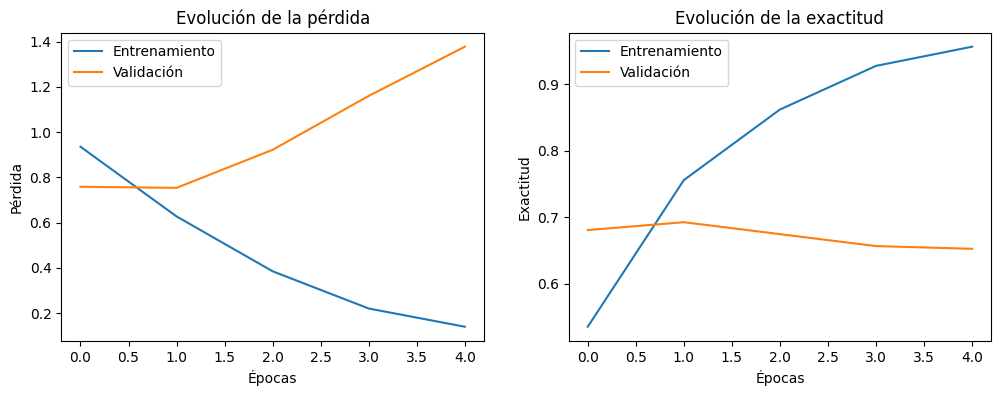

In [17]:
# Construcción y entrenamiento del modelo MLP

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros del modelo
embedding_dim = 64

# Definición del modelo
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compilación
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Visualización del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la exactitud')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

### 4. Evaluación del modelo

Una vez entrenada la red, se evalúa su desempeño sobre el conjunto de prueba.  
Se calcula un reporte de clasificación (precision, recall y F1-score) y se visualiza la matriz de confusión para analizar los aciertos y errores de predicción en cada categoría de sentimiento.

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

    negative      0.684     0.638     0.660      1556
     neutral      0.635     0.691     0.661      2223
    positive      0.758     0.718     0.737      1717

    accuracy                          0.684      5496
   macro avg      0.692     0.682     0.686      5496
weighted avg      0.687     0.684     0.685      5496



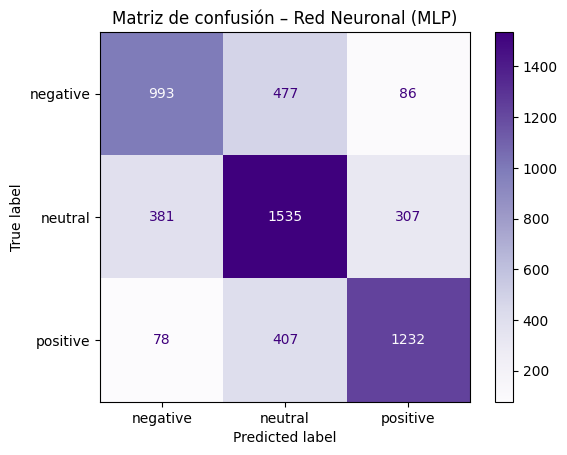

In [18]:
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones sobre el set de prueba
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Reporte de métricas
print(classification_report(y_true, y_pred, target_names=encoder.classes_, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Purples')
plt.title("Matriz de confusión – Red Neuronal (MLP)")
plt.show()

### **Conclusiones de Etapa 2**

En esta segunda etapa se implementó una red neuronal multicapa (MLP) con Keras para la clasificación de sentimientos en tweets.  
El modelo utilizó una capa de embeddings, dos capas densas ocultas con activación ReLU y una capa de salida softmax para predecir tres clases: *positivo*, *neutral* y *negativo*.

Los principales resultados fueron:

- **Exactitud global (accuracy):** 68.4 %  
- **F1-score promedio:** 0.685  
- **Mejor desempeño:** clase *positive*, con F1 = 0.737  
- **Mayor ambigüedad:** clase *neutral*, con F1 = 0.661

El modelo logró resultados similares al obtenido mediante Regresión Logística, lo que sugiere que el conjunto de datos y la representación textual (basada en secuencias cortas) limitan la ganancia adicional de complejidad.  
Aun así, demuestra que las redes neuronales pueden igualar el rendimiento de modelos lineales tradicionales, con la ventaja de poder escalar a arquitecturas más profundas en futuros desarrollos.

Desde una perspectiva analítica, el experimento confirma la hipótesis de que las representaciones textuales basadas en palabras clave (TF-IDF o embeddings básicos) capturan adecuadamente la polaridad emocional, pero resultan insuficientes para distinguir matices sutiles de neutralidad o sarcasmo presentes en lenguaje natural.

### **Perspectivas futuras**

1. **Incorporar embeddings preentrenados (Word2Vec o GloVe)** para mejorar la semántica del modelo.  
2. **Explorar arquitecturas recurrentes (LSTM o GRU)** que capturen dependencias de contexto.  
3. **Ampliar el corpus** incluyendo más tweets o múltiples idiomas para mejorar la generalización.  
4. **Optimizar hiperparámetros y regularización** para reducir el sobreajuste observado entre entrenamiento y validación.  
5. **Implementar una capa de atención (attention layer)** para destacar las palabras más relevantes en la clasificación.

En conjunto, esta etapa demuestra la capacidad del aprendizaje profundo para modelar texto y sienta las bases para futuros desarrollos con redes neuronales más complejas y representaciones semánticas más ricas.